<figure> 
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Máquinas de Soporte Vectorial<center></span>

<figure> 
<center>
<img src="../imagenes/animacion_svm.gif"  width="600" height="600" align="center"/>
<figcaption> Reflejos</figcaption>
</center>
</figure>

Fuente [Zahra Elhamraoui](https://medium.datadriveninvestor.com/support-vector-machine-svm-algorithm-in-a-fun-easy-way-fc23a008c22), vía [Medium](https://medium.com/).

## <span style="color:blue">Referencias</span>

1. [Cristianini, N. and Shawe-Taylor, J., An intorduction to Support vector MAchines and other learning methods, Cambridge, 16th printing, 2014 ](http://library.lol/main/B775D59309583D4894A445C20721F8BF)
1. [Shawe-Taylor, J. and Cristianini, N., Kernel Methods for pattern analysis, Cambridge, 2004](https://libgen.rocks/ads.php?md5=9A2BEA22F1D8CD3BB8B6F99D22D4DCF0)
1. [Scikit learn-SVM](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

## <span style="color:blue">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Campo Elías Pardo, PhD, cepardot@unal.edu.co
1. Daniel  Montenegro, Msc, dammontenegrore@unal.edu.co
1. Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora de medios y marketing digital</span>

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## <span style="color:blue">Introducción</span>

Esta sección está basada principalmente en [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine). En el aprendizaje automático, las máquinas de vectores de soporte (SVM), de support vector machine en inglés, son modelos de aprendizaje supervisado con algoritmos de aprendizaje asociados que analizan datos para clasificación y análisis de regresión. Desarrollado en AT&T Bell Laboratories por Vladimir Vapnik con varios colegas como (Boser et al., 1992, Guyon et al., 1993, Cortes and Vapnik, 1995,  Vapnik et al., 1997).

Las SVM son uno de los métodos de predicción más robustos, basados en marcos de aprendizaje estadístico o teoría VC propuesta por Vapnik (1982, 1995) y Chervonenkis (1974). Dado un conjunto de ejemplos de entrenamiento, cada uno marcado como perteneciente a una de dos categorías, un algoritmo de entrenamiento SVM construye un modelo que asigna nuevos ejemplos a una categoría u otra, convirtiéndolo en un clasificador lineal binario no probabilístico.  SVM asigna ejemplos de entrenamiento a puntos en el espacio para maximizar el ancho de la brecha entre las dos categorías. Luego, los nuevos ejemplos se mapean en ese mismo espacio y se predice que pertenecen a una categoría según el lado de la brecha en el que se encuentran.

Además de realizar una clasificación lineal, las SVM pueden realizar de manera eficiente una clasificación no lineal utilizando lo que se denomina el truco del kernel, mapeando implícitamente sus entradas en espacios de características de alta dimensión.

Para los detalles teóricos consulte la lección [SVM]("svm_010_Intro_SVM.ipynb"). El algoritmo clásico es descrito en la siguiente sección.

## <span style="color:blue">Regularización</span>

### <span style="color:#4CC9F0">Parámetro C </span>


El parámetro de Regularización (a menudo denominado como parámetro C en la biblioteca sklearn de python) le dice a la optimización de SVM cuánto quiere evitar clasificar erróneamente cada ejemplo de entrenamiento.

Para valores grandes de C, la optimización elegirá un hiperplano de margen más pequeño si ese hiperplano hace un mejor trabajo al clasificar correctamente todos los puntos de entrenamiento. Por el contrario, un valor muy pequeño de C hará que el optimizador busque un hiperplano de separación de mayor margen, incluso si ese hiperplano clasifica incorrectamente más puntos.

### <span style="color:#4CC9F0">Parámetro gamma </span>

Gamma se usa cuando usamos el kernel Gaussian RBF. si usa un núcleo lineal o polinomial, entonces no necesita gamma, solo necesita un hipermetro C. En algún lugar también se usa como sigma. En realidad, sigma y gamma están relacionados de la siguiente forma

$$
\gamma = \frac{1}{2\sigma^2}
$$

Gamma decide cuánta curvatura queremos en un límite de decisión.

* Gamma alto significa más curvatura.
* Gamma bajo significa menos curvatura.

## <span style="color:blue"> El ejemplo de clasificación con los datos de Iris con scikit learn</span>

Este es un ejemplo típico de la estadística: el conjunto de datos iris. Por comodidad usaremos únicamente dos clases. El ejemplo es tomado de los [tutoriales de sklearn](https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm)

### <span style="color:#4CC9F0">Lectura de datos y entrenamiento del modelo</span>

In [3]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# importa datos iris 
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# # creamos una instancia de SVM y ajustamos los datos. No escalamos nuestro
# datos ya que queremos trazar los vectores de soporte

# Parámetro de regularización
C = 1.0 

# Modelos
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),

# Entrena los modelos
models = (clf.fit(X, y) for clf in models)

### <span style="color:#4CC9F0">Gráficos</span>

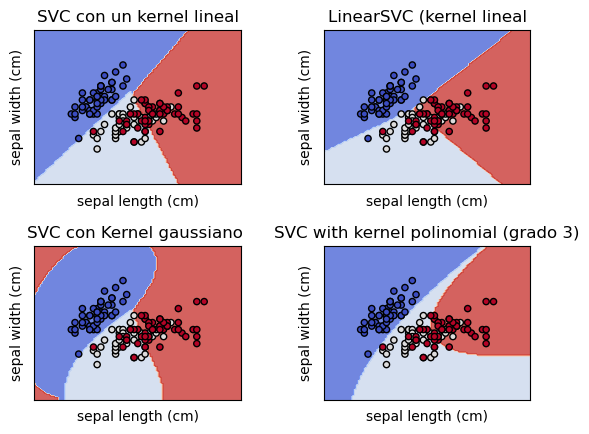

In [3]:
# Títulos para los gráficos
titles = (
    "SVC con un kernel lineal",
    "LinearSVC (kernel lineal",
    "SVC con Kernel gaussiano ",
    "SVC with kernel polinomial (grado 3)",
)

# Grilla 2*2 para las imágenes
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## <span style="color:blue"> El ejemplo de  datos de cancer de seno con scikit learn</span>

Estos datos están disponibles en Kaggle y en scikit-learn. Tomaremos éstos últimos.

### <span style="color:#4CC9F0">Lectura de datos y entrenamiento del modelo</span>

In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# carga y prepara los datos
cancer = datasets.load_breast_cancer()

# 70% entrenamiento and 30% prueba
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) 

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Exactitud: 0.9649122807017544


### <span style="color:#4CC9F0">Validación</span>

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print('Matriz de confusión\n')
print(confusion_matrix(y_test,y_pred))
print('\nReporte de clasificación\n')
print(classification_report(y_test,y_pred))

Matriz de confusión

[[ 61   2]
 [  4 104]]

Reporte de clasificación

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



### <span style="color:#4CC9F0">Ejercicio</span>

Para los dos ejercicios anteriores cosntruya un modelo de clasificación lineal clásico y compare los resultados.

## <span style="color:blue"> Regresión SVM</span>

<figure> 
<center>
<img src="../imagenes/SVR1.png"  width="600" height="600" align="center"/>
<figcaption> Reflejos</figcaption>
</center>
</figure>


Fuente: [analytics vidhya](https://www.analyticsvidhya].com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/)

## <span style="color:blue"> Ejemplo de juguete de Regresión SVM con scikit learn</span>

Usaremos kernels lineal, polinomial y RBF 

In [1]:
%matplotlib inline

In [3]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


### <span style="color:#4CC9F0"> Genera datos de muestra</span>

In [4]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

### <span style="color:#4CC9F0"> Ajusta el modelo de regresión</span>

In [5]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

### <span style="color:#4CC9F0"> Resultados</span>

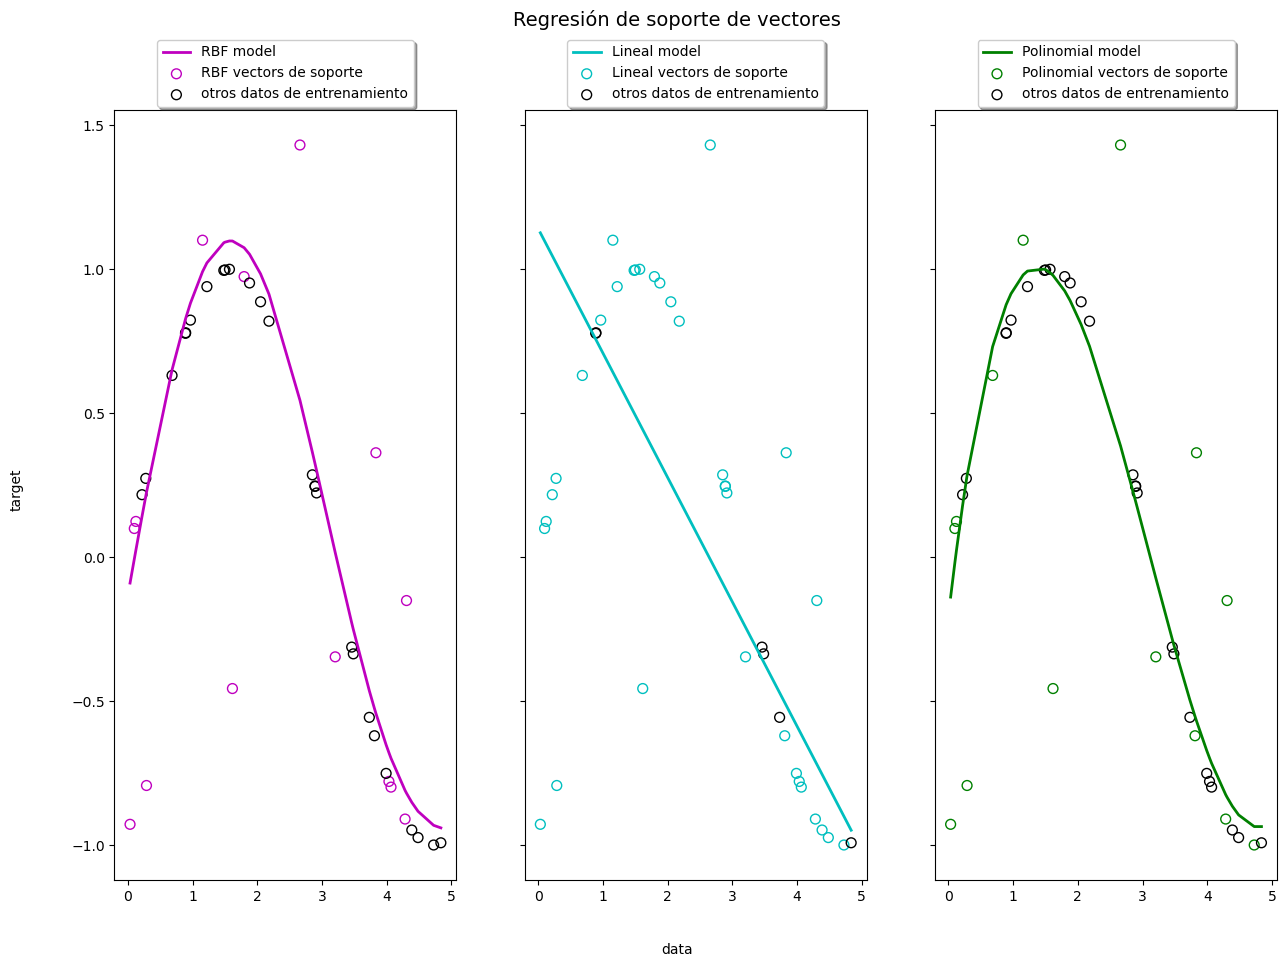

In [6]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Lineal", "Polinomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} vectors de soporte".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="otros datos de entrenamiento",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Regresión de soporte de vectores", fontsize=14)
plt.show()